In [18]:
import numpy as np
import pandas as pd
import sklearn

In [19]:
df = pd.read_csv('/content/Churn_Modelling.csv')

In [20]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [22]:
df.duplicated().sum()

0

In [23]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [24]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [25]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [26]:
df=pd.get_dummies(df,columns =['Geography', 'Gender'],drop_first=True)

In [27]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_Germany  10000 non-null  bool   
 10  Geography_Spain    10000 non-null  bool   
 11  Gender_Male        10000 non-null  bool   
dtypes: bool(3), float64(2), int64(7)
memory usage: 732.5 KB


In [30]:

x= df.drop(columns=['Exited'])
y =df['Exited']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [31]:
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,True,False,True


In [32]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [33]:
x_train


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
2694,628,29,3,113146.98,2,0,1,124749.08,True,False,True
5140,626,29,4,105767.28,2,0,0,41104.82,False,False,False
2568,612,47,6,130024.87,1,1,1,45750.21,True,False,False
3671,646,52,6,111739.40,2,0,1,68367.18,True,False,False
7427,714,33,8,122017.19,1,0,0,162515.17,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...
2895,621,47,7,107363.29,1,1,1,66799.28,True,False,True
7813,684,63,3,81245.79,1,1,0,69643.31,True,False,False
905,672,45,9,0.00,1,1,1,92027.69,False,False,False
5192,663,39,8,0.00,2,1,1,101168.90,False,False,False


In [34]:
y_train

2694    0
5140    0
2568    1
3671    0
7427    0
       ..
2895    0
7813    1
905     1
5192    0
235     1
Name: Exited, Length: 8000, dtype: int64

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [38]:
x_train_scaled[0]

array([-0.23082038, -0.94449979, -0.70174202,  0.58817274,  0.80225696,
       -1.55337352,  0.97725852,  0.42739449,  1.71490137, -0.57273139,
        0.91509065])

In [41]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [77]:
model = Sequential()

model.add(Dense(11, activation = 'relu',input_dim=11))
model.add(Dense(11, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [78]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 11)                132       
                                                                 
 dense_8 (Dense)             (None, 11)                132       
                                                                 
 dense_9 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276 (1.08 KB)
Trainable params: 276 (1.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [79]:
model.compile(loss = 'binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [80]:
history = model.fit(x_train_scaled,y_train,epochs=100 ,validation_split=0.2)

Epoch 1/100
200/200 [==============================] - 1s 3ms/step - loss: 0.5761 - accuracy: 0.7223 - val_loss: 0.4879 - val_accuracy: 0.7969
Epoch 2/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4577 - accuracy: 0.8034 - val_loss: 0.4469 - val_accuracy: 0.8138
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4335 - accuracy: 0.8111 - val_loss: 0.4349 - val_accuracy: 0.8156
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4244 - accuracy: 0.8147 - val_loss: 0.4279 - val_accuracy: 0.8175
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4189 - accuracy: 0.8205 - val_loss: 0.4203 - val_accuracy: 0.8213
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4125 - accuracy: 0.8234 - val_loss: 0.4137 - val_accuracy: 0.8219
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4044 - accuracy: 0.8289 - val_loss: 0.4035 - val_accuracy: 0.8288

In [81]:
model.layers[0].get_weights()

[array([[ 7.54863024e-02,  2.52542319e-04,  2.34473169e-01,
          3.52173179e-01,  1.78731650e-01, -1.57378875e-02,
         -1.86456323e-01,  1.75573230e-02, -8.47509325e-01,
          5.75838313e-02,  1.41000643e-01],
        [ 1.88758016e-01, -3.53346795e-01, -6.43168747e-01,
          5.95658794e-02, -5.42097330e-01,  1.45501816e+00,
          5.88107586e-01, -8.80169943e-02, -5.08679450e-01,
          1.12437928e+00, -4.50506866e-01],
        [-8.52988437e-02, -3.34896058e-01,  1.24468068e-02,
         -3.44778121e-01, -5.01373298e-02, -1.19001858e-01,
          4.77031052e-01,  1.23583511e-01,  2.98580647e-01,
          3.44269246e-01, -1.50669247e-01],
        [ 3.94519538e-01, -1.20999694e-01, -5.73376417e-01,
          6.52623594e-01, -4.48436588e-02, -8.15142691e-02,
          6.73553348e-02, -9.81141388e-01, -5.38933635e-01,
         -2.54361600e-01, -1.12618595e-01],
        [ 1.14752328e+00, -1.60708040e-01,  4.71086472e-01,
         -1.61207810e-01,  1.05438635e-01, -

In [82]:
y_log = model.predict(x_test_scaled)

63/63 [==============================] - 0s 1ms/step


In [83]:
y_pred= np.where(y_log>0.5,1,0)

In [84]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.864

In [85]:
import matplotlib.pyplot as plt

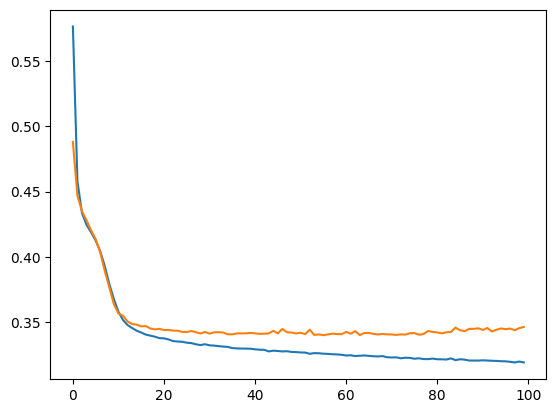

In [86]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

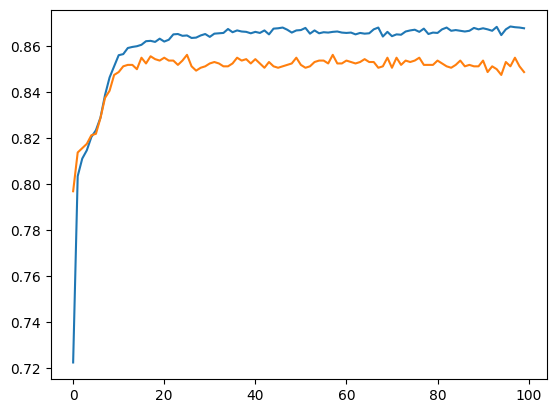

In [87]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])